## Experimental Boxing data review.ipynb

This notebook contains a review of the (thus far) collected boxing data. Here we inspect the data, perform preprocessing and conduct primary analysis and visualizations. </br>

Eight continuous data measurements were taken, (almost) all of them containing 300 seconds of data measuring up to 150 punches per dataset. Except for the control measurements which meant standing still and moving sligthly without throwing any punches. 

The following features were extrated from *Phyphox* app. 
- Rotation on the x-axis
- Rotation on the y-axis
- Rotation on the z-axis
- Acceleration on the x-axis
- Acceleration on the y-axis
- Acceleration on the z-axis
- Proximity (an experimental measurement which we shan't use)

We decided to exclude barometer as this measures air pressures in Pascal, which is not interesting in the cause of our experiment since we're collecting biometric data. 

![image.png](attachment:fe40c59d-a68b-431e-9f55-204343da9c7f.png)

</br>All Rotation and Acceleration datasets were collected at a sampling rate of **50Hz** (50Hz means that mobile device collects 50 datapoints per second). The decision was made due to the following reasons as the follows:
- Professional (right handed) boxers take 60-100ms to throw a jab; 150-200ms to throw a cross and other punches;
- Considering the fact that we are hobby-level boxers, it will take us (and other junior boxers) a slightly longer time to throw punches;
- This, we assume that it will take us approximately 250ms to throw a punch. Ideally, a sampling frequency of 250Hz shall be able to record a punching behavior whti a high temopral resolution (1ms/datapoint); however, this will result in millions of datapoints which is computationally expensive. Alternatively, we balance this by reducing the temporai resolution to 5ms/datapoint ->50Hz
- According to **Nyquist Shannon Sampling Theorem**, the sampling rate must be twice the analog bandwidth of the incoming signal to record a full-scale event including possible buffers (e.g.: few seconds to reposition your arm). We take twice of the 25Hz -> 50Hz.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils

# Directory path of saving figures
dirpath_savefig = "Figures"

  _________________________________
| Feed me some grass! Ik heb honger |
                                 \
                                  \
                                    ^__^
                                    (oo)\_______
                                    (__)\       )\/\
                                        ||----w |
                                        ||     ||


##### Changes in the fild loading method:
Because we are having more data with more complicated info of number of run and number of subject, loading and naming them one-by-one is getting inefficient. </br>

To load all files and data we need in one go: We loop through the *Data/Raw Data/Experimental* folder and selectively, consistently load the info we need to a dictionary. </br>

In the new file loading method, file names will be chaned as: *punchtype_subject No._run_number_datatype*. </br>
E.g.: *cross_01_01_Gyroscope*: Gyroscope data from the 1st Subject collected in 1st run



###### Old method of loading files (commented)

In [3]:
# # Change the filepath and dirpath accordingly to the location of datasets on your own device 

# # For naming convenience:
# # lh -> Lead Hook
# # rh -> Rear Hook
# # lu -> Lead Uppercut
# # ru -> Rear Uppercut
# # acc -> Acceleration
# # gyr -> Gyroscope (rotation)
# # bar -> Barometer (pressure)
# # pre -> preliminary

# dirpath_experimental_data = "Data/Raw Data/Experimental"

# dirpath_left_nopunch = "Data/Raw Data/Experimental/leftnopunch_sub-01_run-01/"
# dirpath_right_nopunch = "Data/Raw Data/Experimental/rightnopunch_sub-01_run-01/"
# dirpath_jab = "Data/Raw Data/Experimental/jab_sub-01_run-01/"
# dirpath_cross = "Data/Raw Data/Experimental/cross_sub-01_run-01/"
# dirpath_lh = "Data/Raw Data/Experimental/lefthook_sub-01_run-01"
# dirpath_rh = "Data/Raw Data/Experimental/righthook_sub-01_run-01/"
# dirpath_lu = "Data/Raw Data/Experimental/leftupper_sub-01_run-01/"
# dirpath_ru = "Data/Raw Data/Experimental/rightupper_sub-01_run-01/"

# dirpath_savefig = "Figures/Experimental Data/"

In [4]:
# # Left hand data without punch
# left_nopunch_acc = pd.read_csv(os.path.join(dirpath_left_nopunch,"Linear Acceleration.csv"))
# left_nopunch_gyr = pd.read_csv(os.path.join(dirpath_left_nopunch,"Gyroscope.csv"))

# # Right hand data without punch
# right_nopunch_acc = pd.read_csv(os.path.join(dirpath_right_nopunch,"Linear Acceleration.csv"))
# right_nopunch_gyr = pd.read_csv(os.path.join(dirpath_right_nopunch,"Gyroscope.csv"))

# # Jab data
# jab_acc = pd.read_csv(os.path.join(dirpath_jab,"Linear Acceleration.csv"))
# jab_gyr = pd.read_csv(os.path.join(dirpath_jab,"Gyroscope.csv"))

# # Cross data
# cross_acc = pd.read_csv(os.path.join(dirpath_cross,"Linear Acceleration.csv"))
# cross_gyr = pd.read_csv(os.path.join(dirpath_cross,"Gyroscope.csv"))

# # Lead Hook data
# lefthook_acc = pd.read_csv(os.path.join(dirpath_lh,"Linear Acceleration.csv"))
# lefthook_gyr = pd.read_csv(os.path.join(dirpath_lh,"Gyroscope.csv"))

# # Rear Hook data
# righthook_acc = pd.read_csv(os.path.join(dirpath_rh,"Linear Acceleration.csv"))
# righthook_gyr = pd.read_csv(os.path.join(dirpath_rh,"Gyroscope.csv"))

# # Lead Uppercut data
# leftupper_acc = pd.read_csv(os.path.join(dirpath_lu,"Linear Acceleration.csv"))
# leftupper_gyr = pd.read_csv(os.path.join(dirpath_lu,"Gyroscope.csv"))

# # Rear Uppercut data
# rightupper_acc = pd.read_csv(os.path.join(dirpath_ru,"Linear Acceleration.csv"))
# rightupper_gyr = pd.read_csv(os.path.join(dirpath_ru,"Gyroscope.csv"))


In [5]:
# # Use dictionary to store dataframe for easier preprocessing
# dict_exp_data = {
#     "left_nopunch_acc" : left_nopunch_acc,
#     "left_nopunch_gyr" : left_nopunch_gyr,
#     "jab_acc" : jab_acc,
#     "jab_gyr" : jab_gyr,
#     "cross_acc" : cross_acc,
#     "cross_gyr" : cross_gyr,
#     "lefthook_acc" : lefthook_acc,
#     "lefthook_gyr" : lefthook_gyr,
#     "righthook_acc" : righthook_acc,
#     "righthook_gyr" : righthook_gyr,
#     "leftupper_acc" : leftupper_acc,
#     "leftupper_gyr" : leftupper_gyr,
#     "rightupper_acc" : rightupper_acc,
#     "rightypper_gyr" : rightupper_gyr
# }

In [6]:
# # Changing colnames for consistency

# acc_columns = {"Linear Acceleration x (m/s^2)" : "X (m/s^2)",
#                "Linear Acceleration y (m/s^2)" : "Y (m/s^2)",
#                "Linear Acceleration z (m/s^2)" : "Z (m/s^2)"
#                }

# gyr_columns = {"Gyroscope x (rad/s)" : "X (rad/s)",
#                "Gyroscope y (rad/s)" : "Y (rad/s)",
#                "Gyroscope z (rad/s)" : "Z (rad/s)"
#               }
        
# left_nopunch_acc.rename(columns=acc_columns, inplace=True)
# left_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

# right_nopunch_acc.rename(columns=acc_columns, inplace=True)
# right_nopunch_gyr.rename(columns=gyr_columns, inplace=True)

# jab_acc.rename(columns=acc_columns, inplace=True)
# jab_gyr.rename(columns=gyr_columns, inplace=True)

# cross_acc.rename(columns=acc_columns, inplace=True)
# cross_gyr.rename(columns=gyr_columns, inplace=True)

# lefthook_acc.rename(columns=acc_columns, inplace=True)
# lefthook_gyr.rename(columns=gyr_columns, inplace=True)

# righthook_acc.rename(columns=acc_columns, inplace=True)
# righthook_gyr.rename(columns=gyr_columns, inplace=True)

# leftupper_acc.rename(columns=acc_columns, inplace=True)
# leftupper_gyr.rename(columns=gyr_columns, inplace=True)

# rightupper_acc.rename(columns=acc_columns, inplace=True)
# rightupper_gyr.rename(columns=gyr_columns, inplace=True)

###### New method of loading files (run the following block to automatically load all data we need in one go, even when we add new data to this folder later)

In [7]:
### Naming explanation:
# punchtype_subject No._run_number_datatype
# cross_01_01_Gyroscope: Gyroscope data of the 1st Subject collected in 1st run

dirpath_experimental_data = "Data/Raw Data/Experimental"
dict_exp_data = dict()


# Walk through each folder in Experimental Data Folder 
for foldername in os.listdir(dirpath_experimental_data):
    
    # punch_name = "_".join(foldername.split("_")[:2])

    # Walk through each file in each folder. Fetch and load the Linear Acceleration data and Gyroscope data
    for filename in os.listdir(os.path.join(dirpath_experimental_data,foldername)):
        
        if any([filename.startswith("Gyroscope"), filename.startswith("Linear")]):

            data_name = str(foldername) + "_" + str(filename)
            
            # Modify the file name to make the format consistent
            data_name = "_".join(data_name.replace(".csv","").replace("Accelerometer", "Acceleration").replace("sub-", "").replace("run-","").split("_"))

            # Assign each csv as a DataFrame to a dictionary
            data_content = pd.read_csv(os.path.join(dirpath_experimental_data, foldername, filename))
            dict_exp_data.setdefault(data_name, data_content)

print(dict_exp_data.keys())

dict_keys(['cross_01_01_Gyroscope', 'cross_01_01_Linear Acceleration', 'cross_02_01_Gyroscope', 'cross_02_01_Linear Acceleration', 'cross_03_01_Gyroscope', 'cross_03_01_Linear Acceleration', 'jab_01_01_Gyroscope', 'jab_01_01_Linear Acceleration', 'jab_02_01_Gyroscope', 'jab_02_01_Linear Acceleration', 'jab_03_01_Gyroscope', 'jab_03_01_Linear Acceleration', 'lefthook_01_01_Gyroscope', 'lefthook_01_01_Linear Acceleration', 'lefthook_02_01_Gyroscope', 'lefthook_02_01_Linear Acceleration', 'lefthook_03_01_Gyroscope', 'lefthook_03_01_Linear Acceleration', 'leftnopunch_01_01_Gyroscope', 'leftnopunch_01_01_Linear Acceleration', 'leftnopunch_02_01_Gyroscope', 'leftnopunch_02_01_Linear Acceleration', 'leftnopunch_03_01_Gyroscope', 'leftnopunch_03_01_Linear Acceleration', 'leftuppercut_02_01_Gyroscope', 'leftuppercut_02_01_Linear Acceleration', 'leftuppercut_03_01_Gyroscope', 'leftuppercut_03_01_Linear Acceleration', 'leftupper_01_01_Gyroscope', 'leftupper_01_01_Linear Acceleration', 'righthook_

In [8]:
# Changing colnames for consistency

acc_columns = {"Linear Acceleration x (m/s^2)" : "X (m/s^2)",
               "Linear Acceleration y (m/s^2)" : "Y (m/s^2)",
               "Linear Acceleration z (m/s^2)" : "Z (m/s^2)"
               }

gyr_columns = {"Gyroscope x (rad/s)" : "X (rad/s)",
               "Gyroscope y (rad/s)" : "Y (rad/s)",
               "Gyroscope z (rad/s)" : "Z (rad/s)"
               }

for df_name, df_content in dict_exp_data.items():
    
    if df_name.endswith("Linear Acceleration"):
        df_content.rename(columns=acc_columns, inplace=True)

    elif df_name.endswith("Gyroscope"):
        df_content.rename(columns=gyr_columns, inplace=True)

## 1. Quick Inspection of Raw Data 
#### (Examole of jab)

In [9]:
dict_exp_data["jab_01_01_Gyroscope"]

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.069918,-0.326094,-0.113847,0.045139
1,0.089800,-0.276561,-0.312646,0.023302
2,0.109685,-0.224831,-0.395801,0.013715
3,0.129602,-0.172102,-0.385681,0.006791
4,0.149470,-0.127295,-0.320103,0.005726
...,...,...,...,...
15080,300.016878,1.413631,0.170238,-0.034753
15081,300.036790,0.964835,1.143994,-0.283152
15082,300.056665,0.596530,1.458504,-0.358850
15083,300.076569,0.269770,1.392925,-0.249597


In [10]:
dict_exp_data["jab_03_01_Gyroscope"]

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.002655,0.024320,0.089832,0.083275
1,0.022655,0.006149,0.080580,0.062872
2,0.042655,-0.019618,0.090134,0.051440
3,0.062654,-0.035330,0.092124,0.045177
4,0.082654,-0.051250,0.087529,0.034938
...,...,...,...,...
15002,300.049816,-0.087155,0.103793,-0.200508
15003,300.069817,-0.092551,0.224128,-0.227623
15004,300.089817,-0.117639,0.439048,-0.306708
15005,300.109818,-0.098332,0.795755,-0.418347


In [11]:
dict_exp_data["jab_01_01_Linear Acceleration"]

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.069918,-0.828782,-0.202890,-0.122719
1,0.089800,-0.536640,-0.309360,0.009911
2,0.109685,-0.366417,-0.256942,-0.051787
3,0.129602,-0.154796,-0.186984,-0.120690
4,0.149470,-0.058973,-0.196596,-0.179481
...,...,...,...,...
15079,299.997001,2.166874,8.574938,6.054503
15080,300.016878,2.219635,8.002416,6.136904
15081,300.036790,1.286067,7.608963,3.569860
15082,300.056665,1.067307,6.728621,1.599188


In [12]:
dict_exp_data["jab_01_01_Gyroscope"]

,Time (s),X (rad/s),Y (rad/s),Z (rad/s)
0,0.069918,-0.326094,-0.113847,0.045139
1,0.089800,-0.276561,-0.312646,0.023302
2,0.109685,-0.224831,-0.395801,0.013715
3,0.129602,-0.172102,-0.385681,0.006791
4,0.149470,-0.127295,-0.320103,0.005726
...,...,...,...,...
15080,300.016878,1.413631,0.170238,-0.034753
15081,300.036790,0.964835,1.143994,-0.283152
15082,300.056665,0.596530,1.458504,-0.358850
15083,300.076569,0.269770,1.392925,-0.249597


In [13]:
# Statistical summary of raw data (Mean, Median, quantiles, etc.)
for exp_data in dict_exp_data.keys():
    print(f"{exp_data}:")
    print(dict_exp_data[exp_data].describe())

cross_01_01_Gyroscope:
           Time (s)     X (rad/s)     Y (rad/s)     Z (rad/s)
count  15084.000000  15084.000000  15084.000000  15084.000000
mean     150.069182     -0.082279     -0.004612      0.042743
std       86.614270      1.345713      3.014926      2.903954
min        0.065232    -10.224772    -14.524852    -14.267998
25%       75.066289     -0.443137     -0.812307     -0.350795
50%      150.068535      0.024301      0.014580      0.048668
75%      225.071746      0.608048      0.864370      0.591537
max      300.075819      5.900592     12.296783     11.809573
cross_01_01_Linear Acceleration:
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  15083.000000  15083.000000  15083.000000  15083.000000
mean     150.059237      1.843444     -0.477067     -0.117253
std       86.608528      3.180320     11.353425      2.893654
min        0.065232    -23.371994    -79.425682    -21.046177
25%       75.061313     -0.199319     -0.510890     -0.674737
50%      150.0

In [14]:
# Make a copy of dataframes WITHOUT TIME, for better analysis
dict_exp_data_no_time = dict()

for data in dict_exp_data.keys():
    no_time_key = data + "_noTime"
    no_time_df = dict_exp_data[data].drop('Time (s)', axis=1)
    dict_exp_data_no_time.setdefault(no_time_key, no_time_df)

In [15]:
dict_exp_data_no_time.keys()

dict_keys(['cross_01_01_Gyroscope_noTime', 'cross_01_01_Linear Acceleration_noTime', 'cross_02_01_Gyroscope_noTime', 'cross_02_01_Linear Acceleration_noTime', 'cross_03_01_Gyroscope_noTime', 'cross_03_01_Linear Acceleration_noTime', 'jab_01_01_Gyroscope_noTime', 'jab_01_01_Linear Acceleration_noTime', 'jab_02_01_Gyroscope_noTime', 'jab_02_01_Linear Acceleration_noTime', 'jab_03_01_Gyroscope_noTime', 'jab_03_01_Linear Acceleration_noTime', 'lefthook_01_01_Gyroscope_noTime', 'lefthook_01_01_Linear Acceleration_noTime', 'lefthook_02_01_Gyroscope_noTime', 'lefthook_02_01_Linear Acceleration_noTime', 'lefthook_03_01_Gyroscope_noTime', 'lefthook_03_01_Linear Acceleration_noTime', 'leftnopunch_01_01_Gyroscope_noTime', 'leftnopunch_01_01_Linear Acceleration_noTime', 'leftnopunch_02_01_Gyroscope_noTime', 'leftnopunch_02_01_Linear Acceleration_noTime', 'leftnopunch_03_01_Gyroscope_noTime', 'leftnopunch_03_01_Linear Acceleration_noTime', 'leftuppercut_02_01_Gyroscope_noTime', 'leftuppercut_02_01_

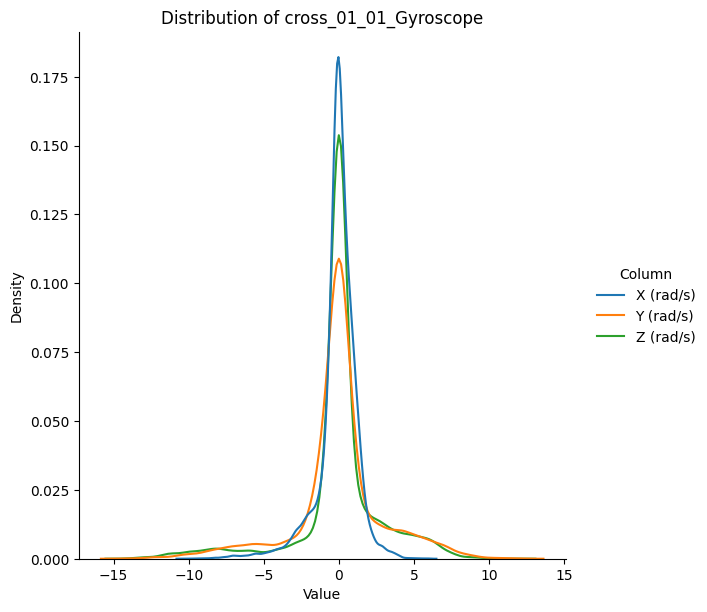

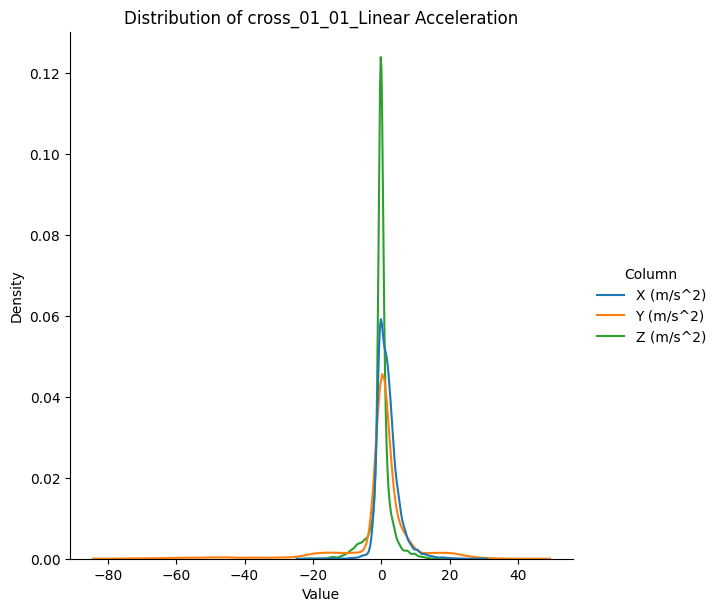

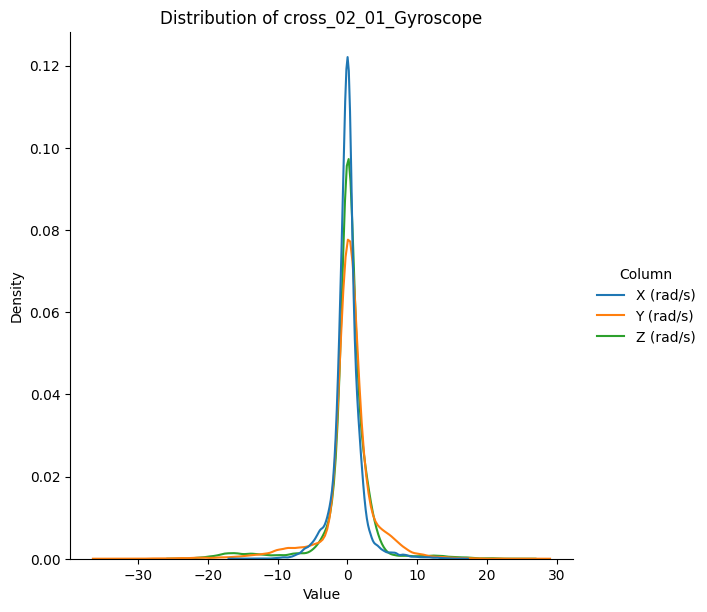

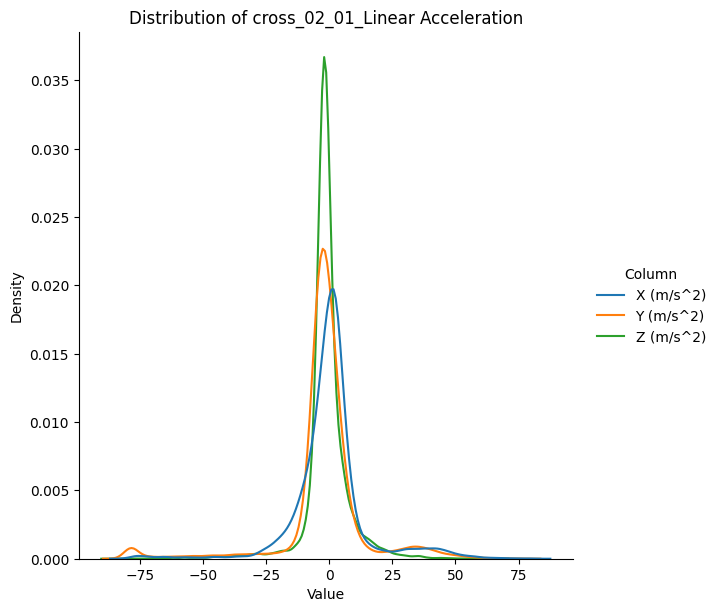

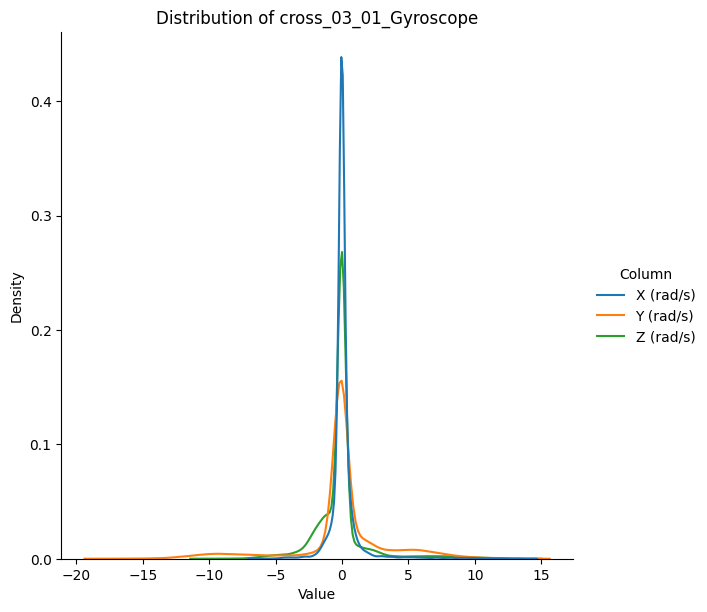

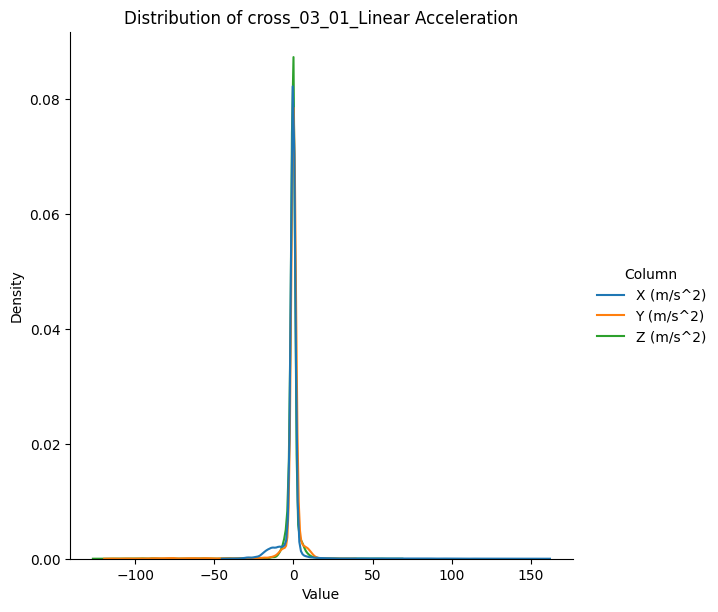

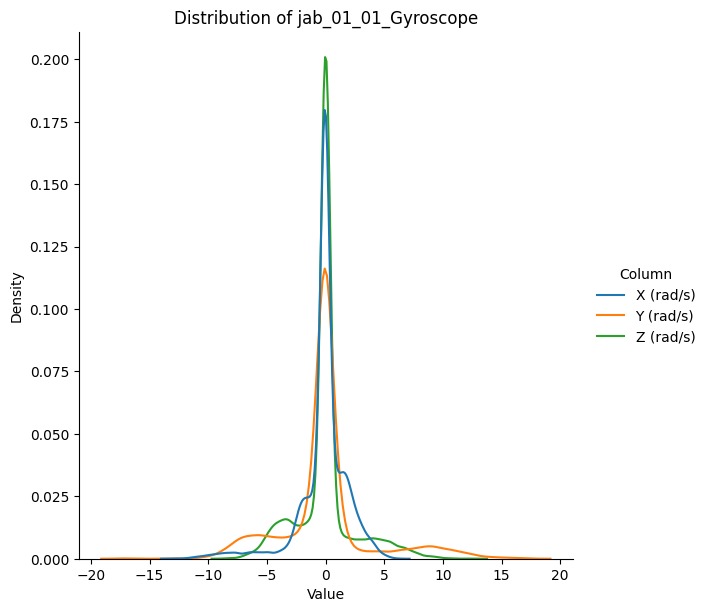

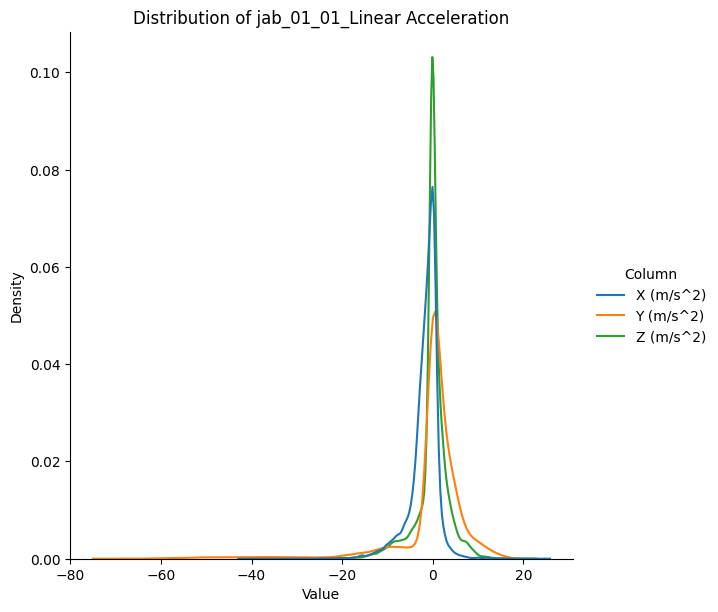

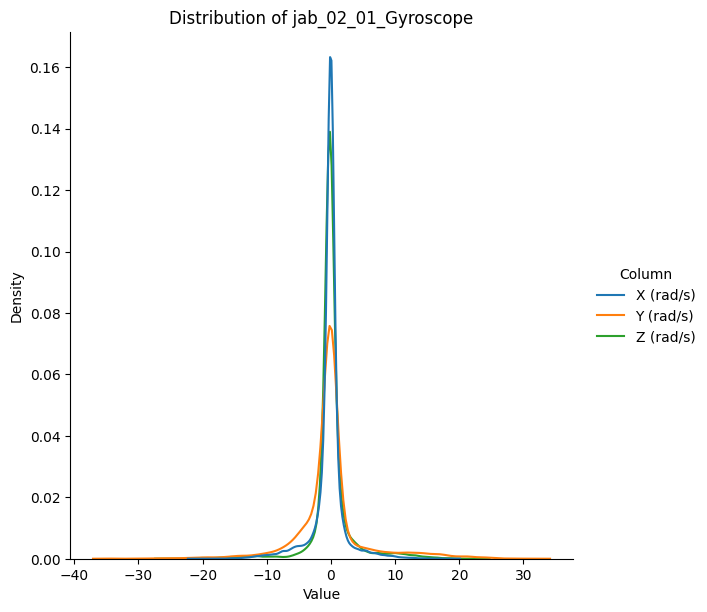

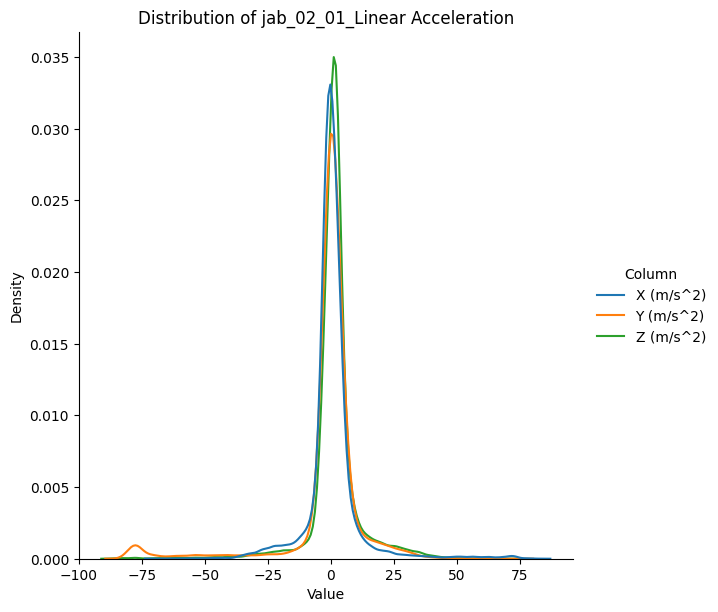

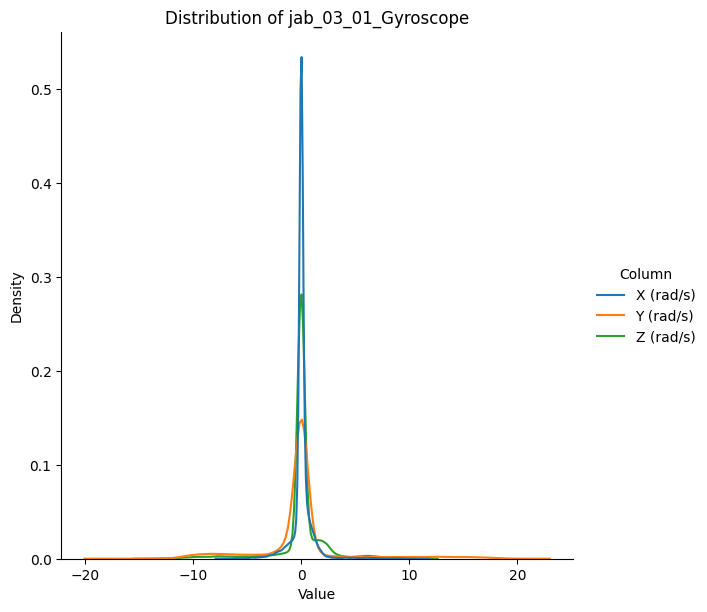

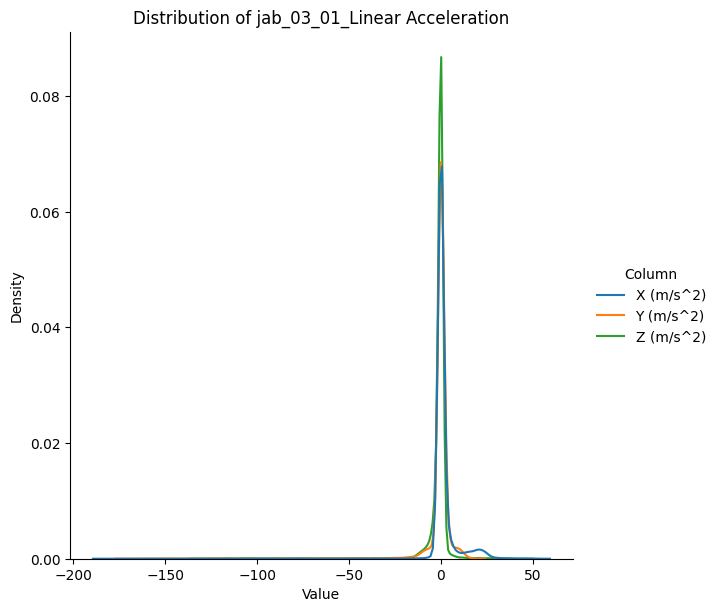

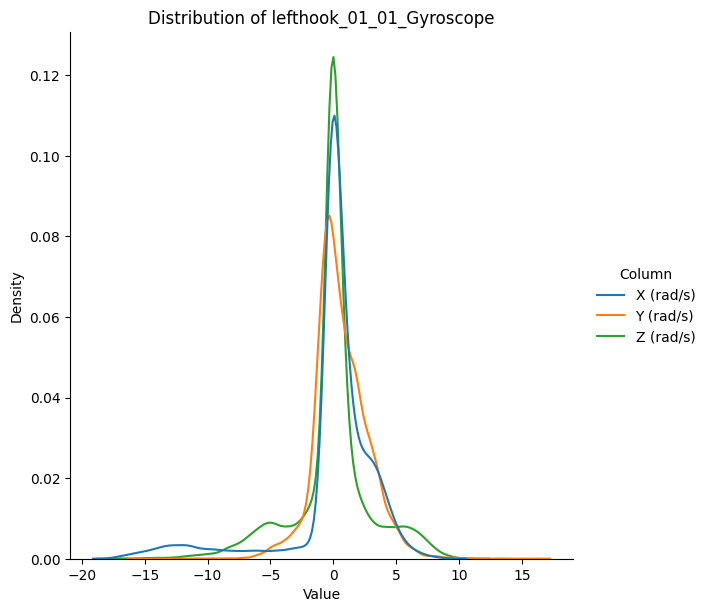

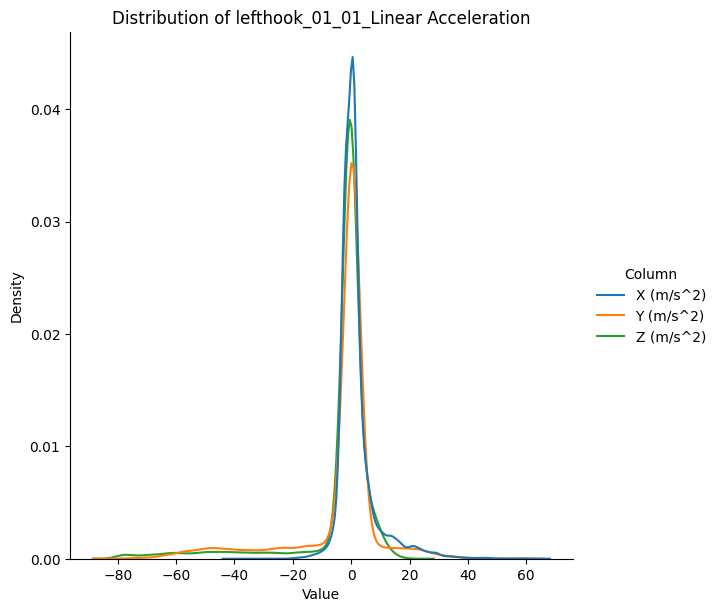

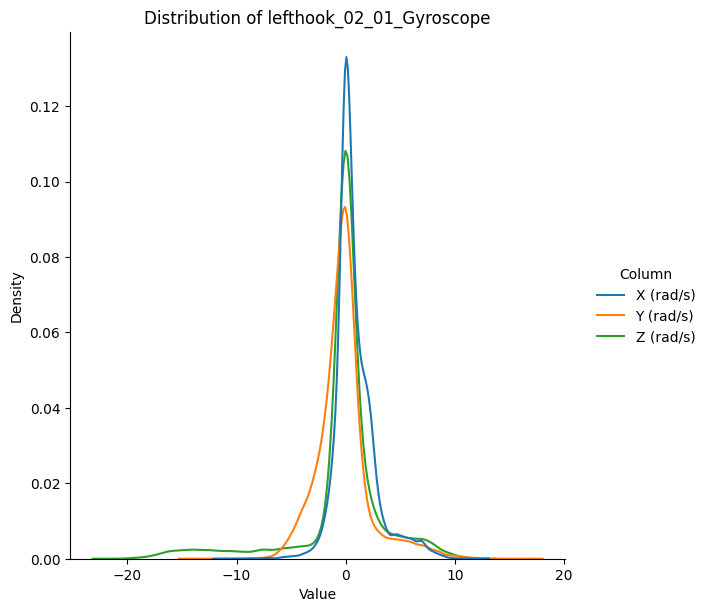

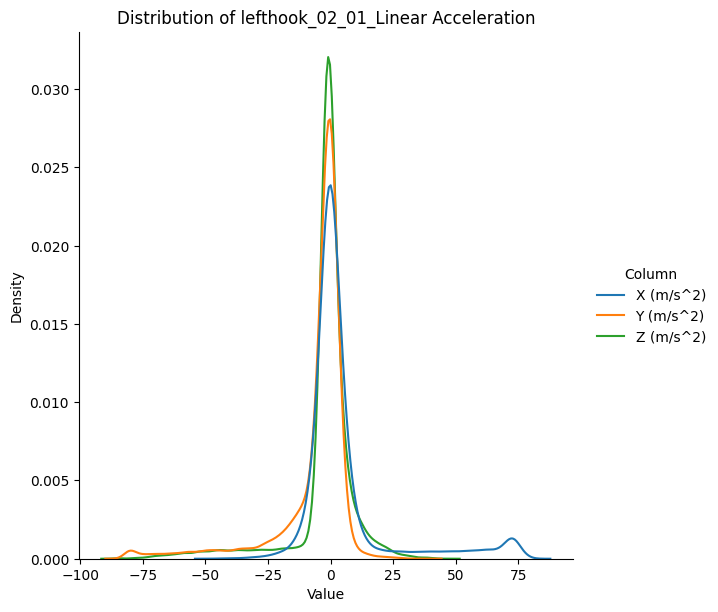

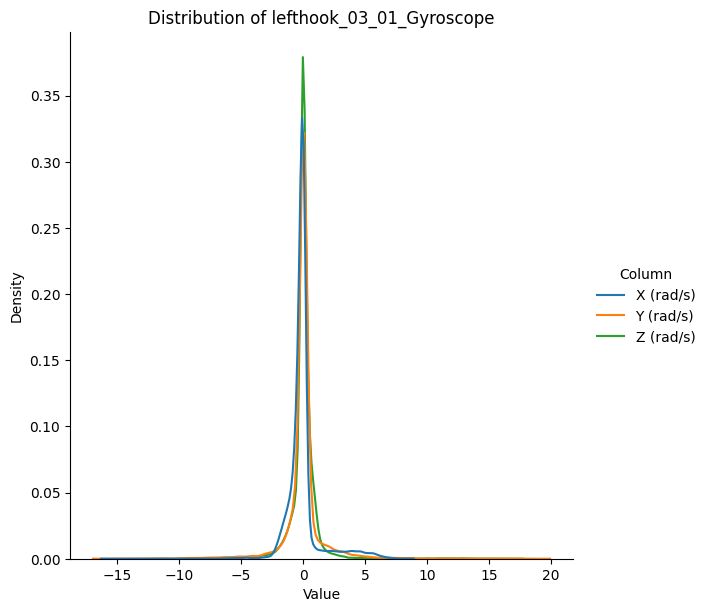

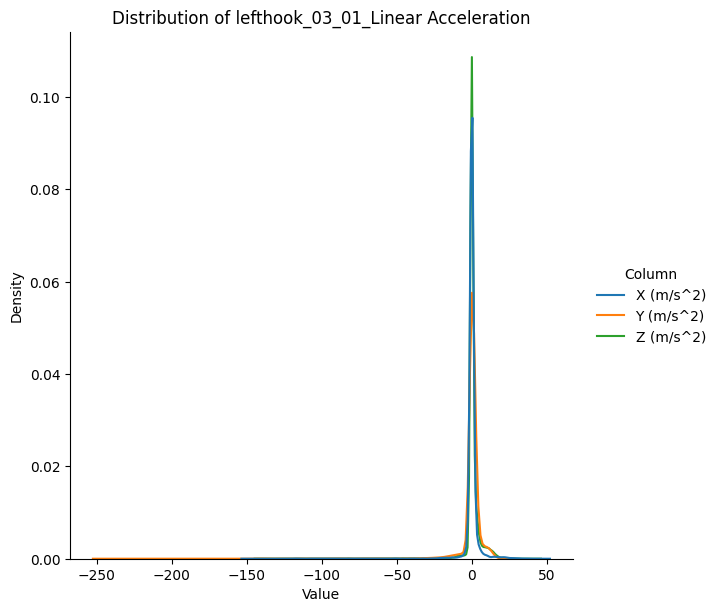

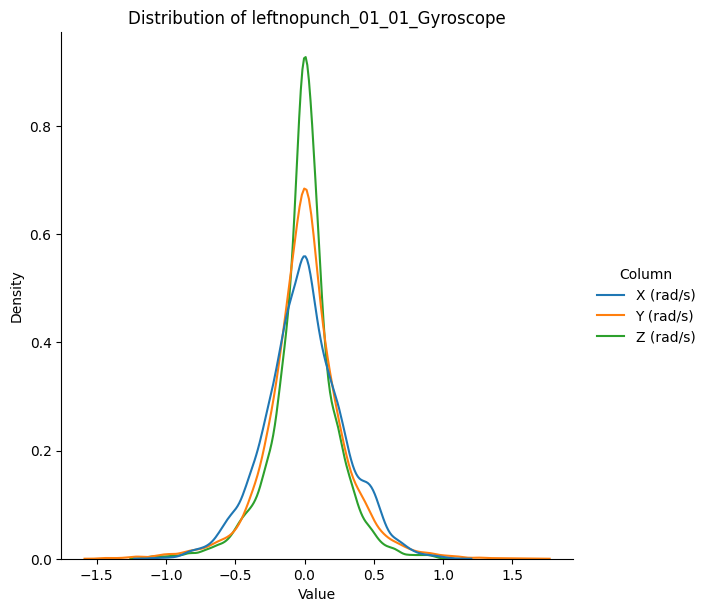

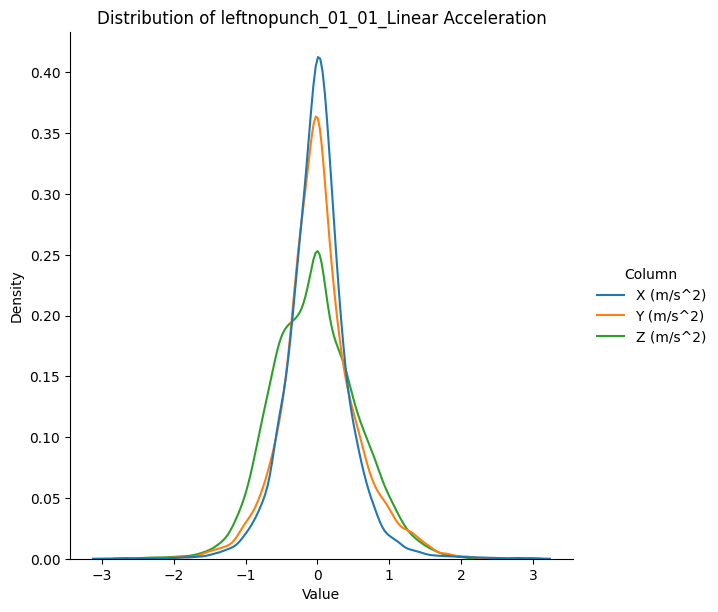

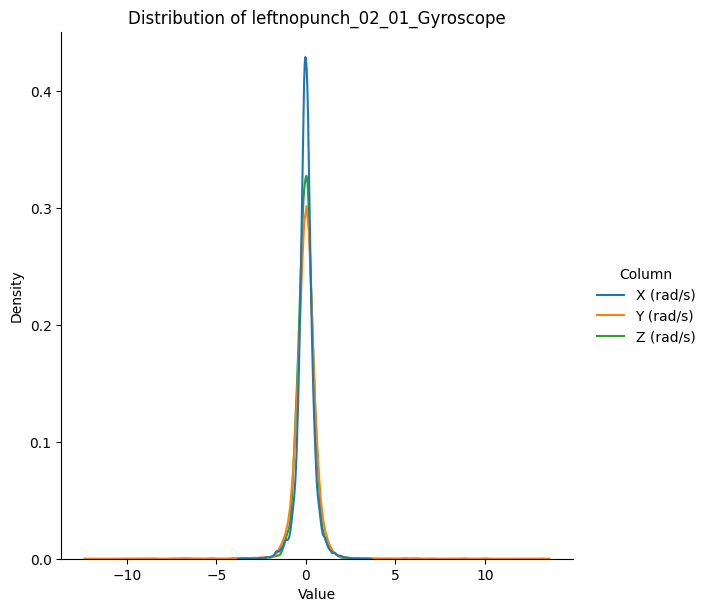

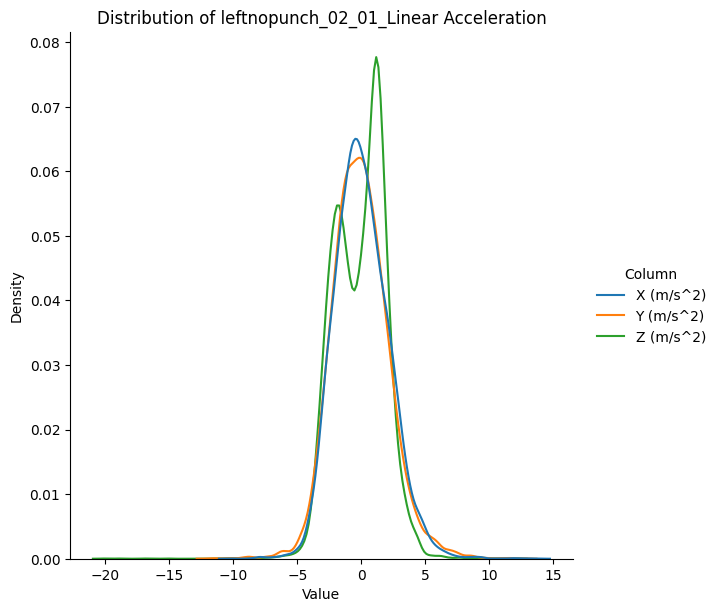

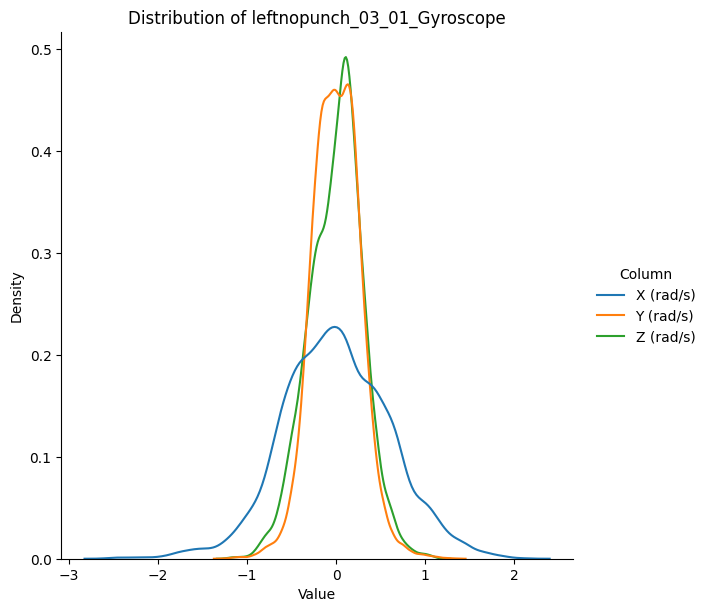

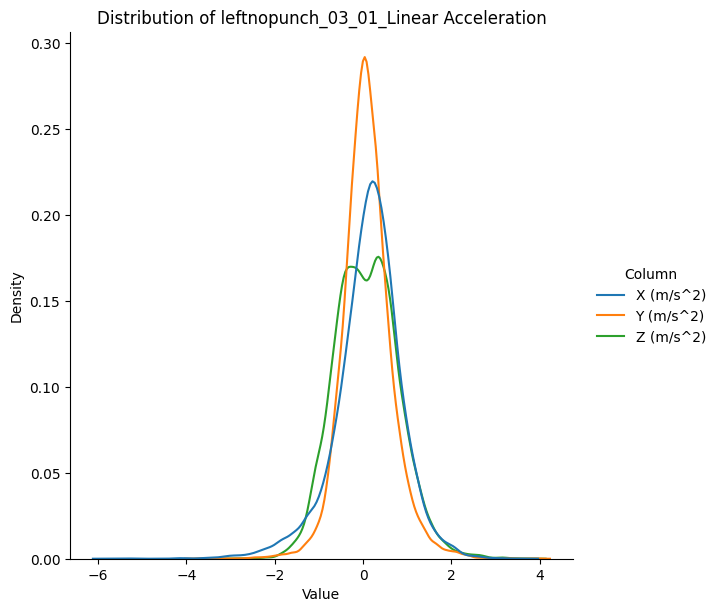

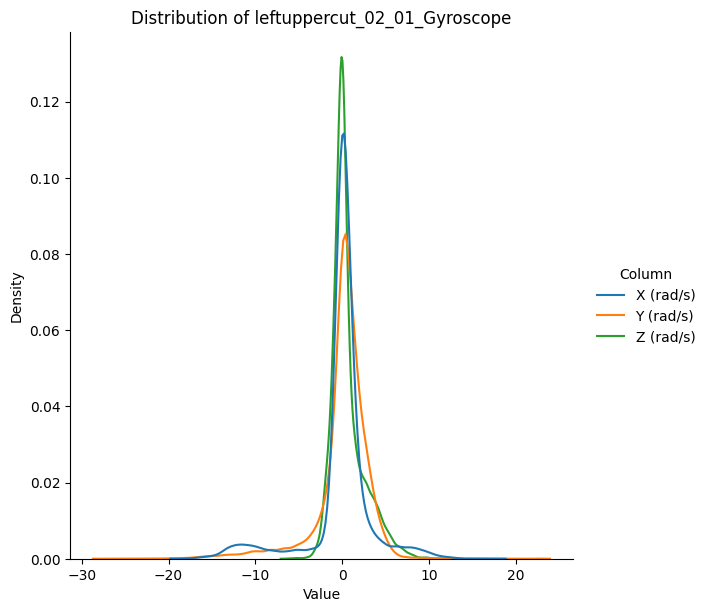

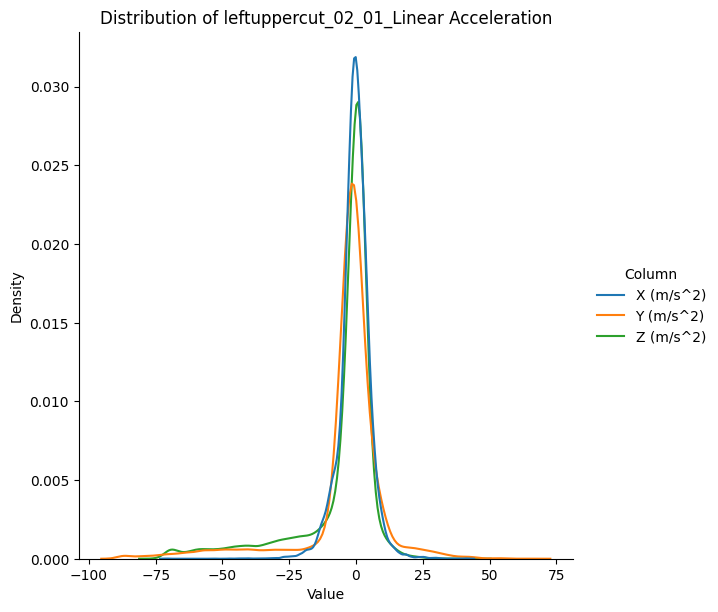

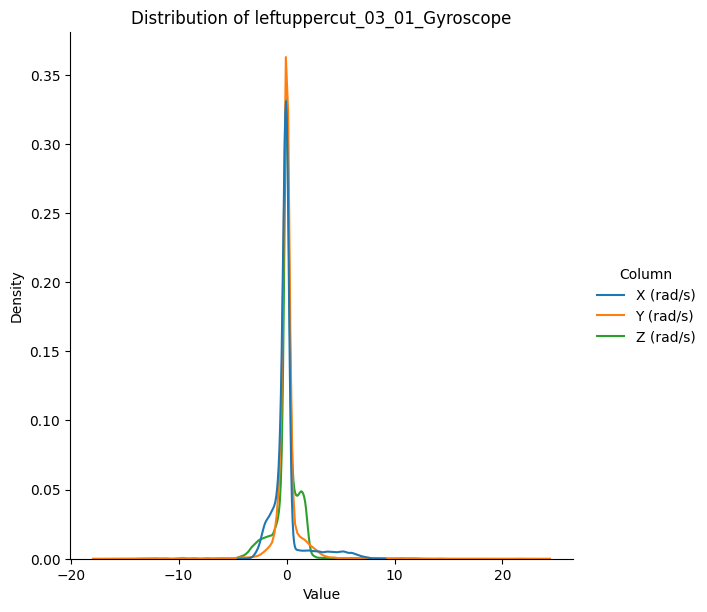

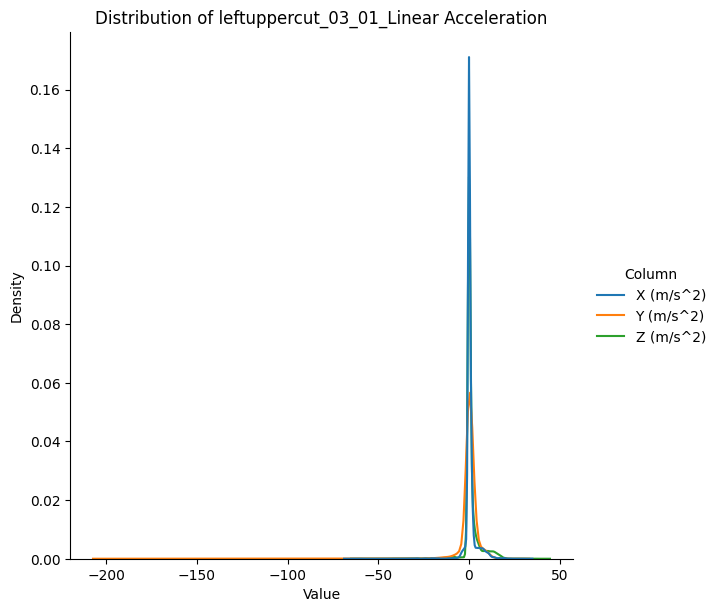

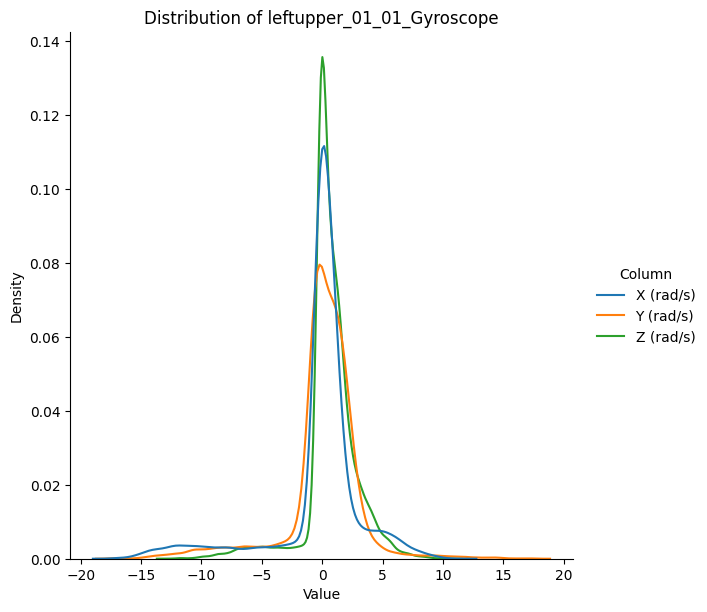

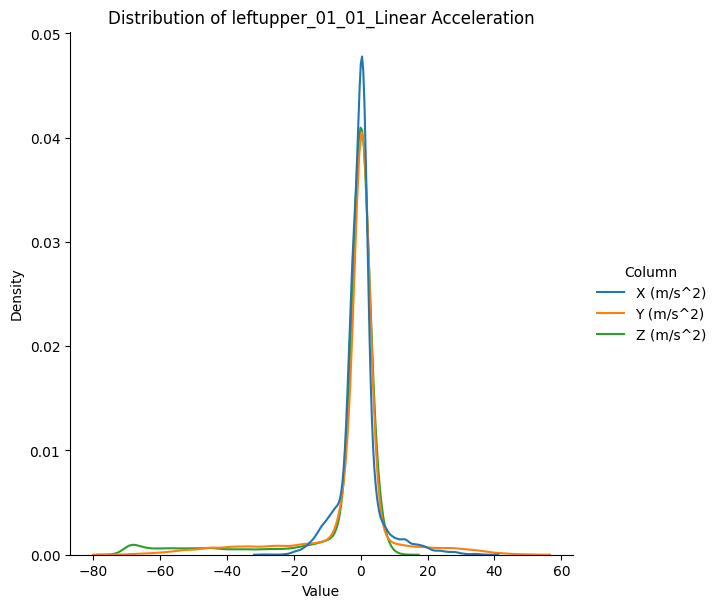

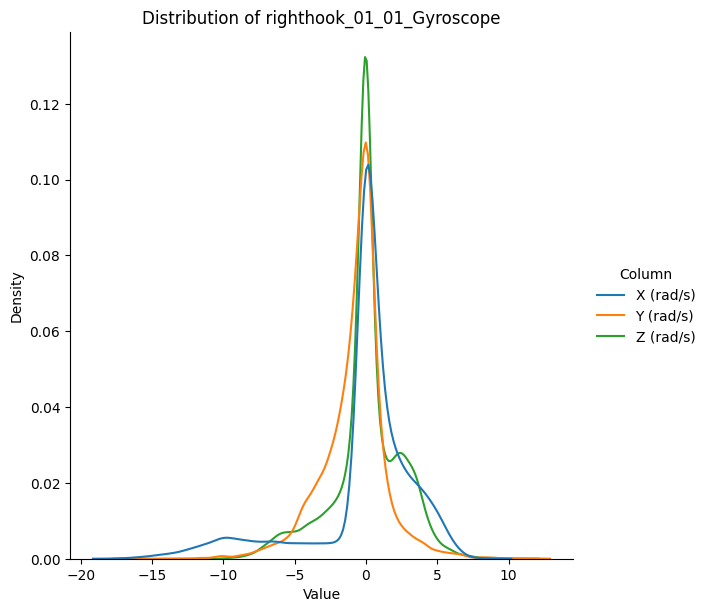

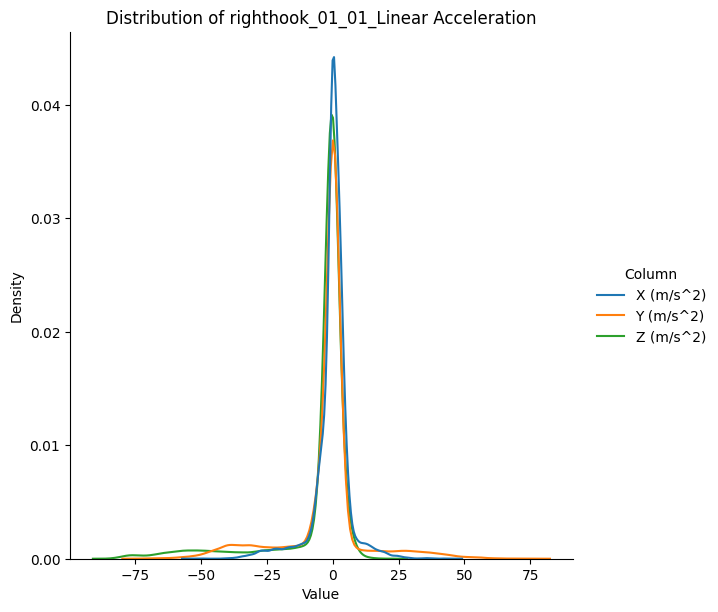

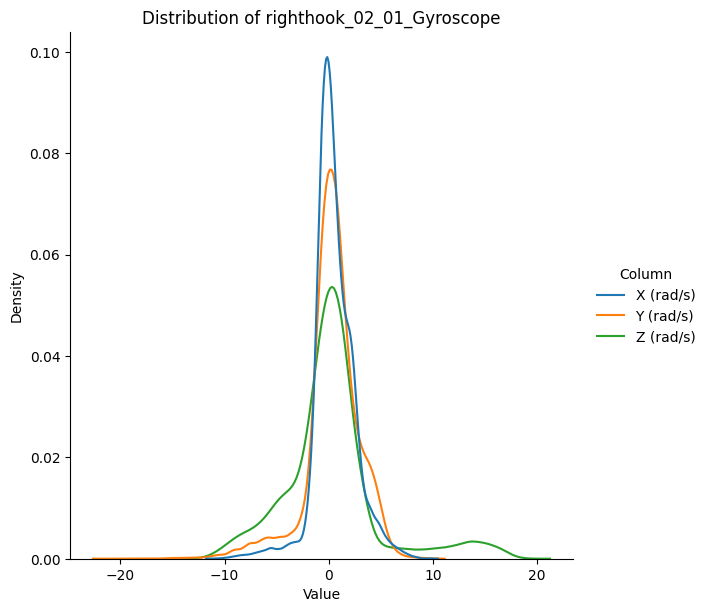

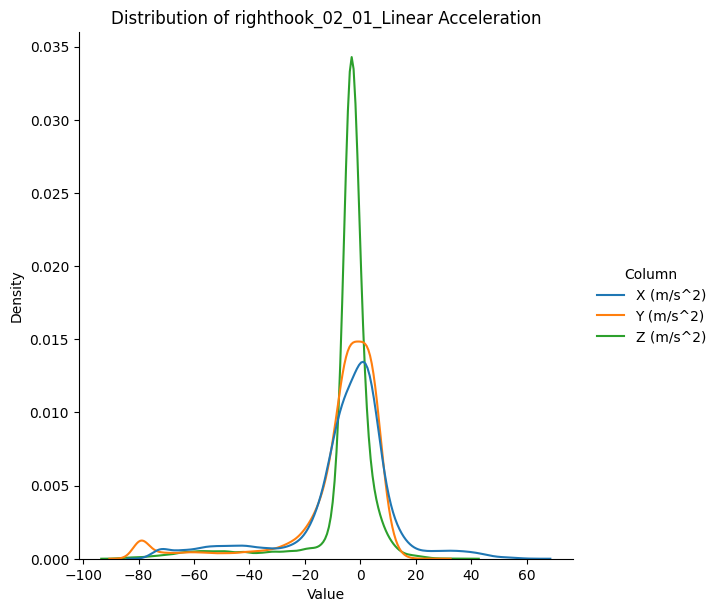

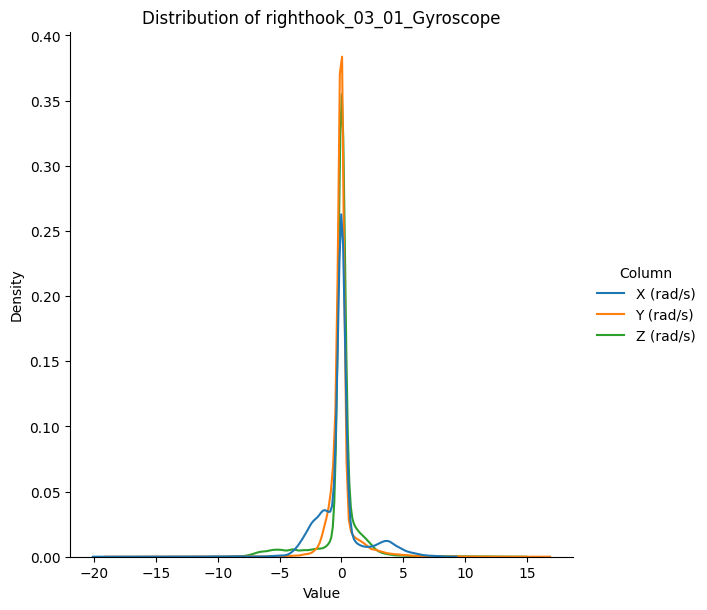

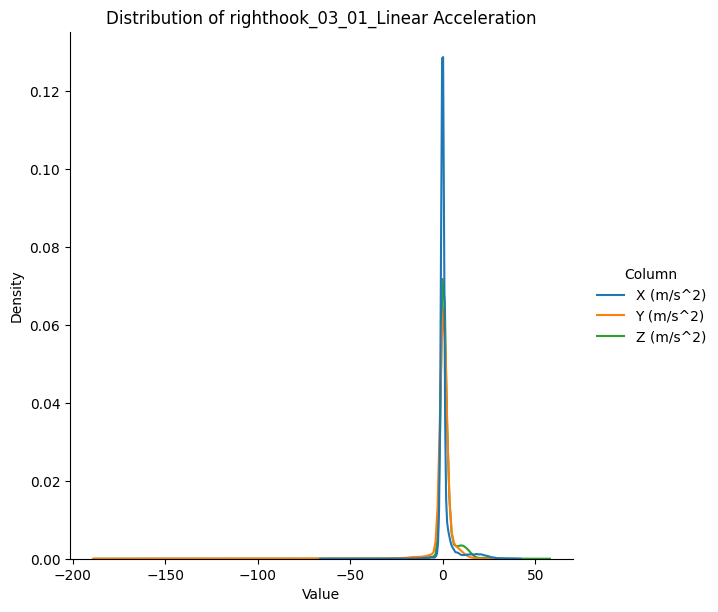

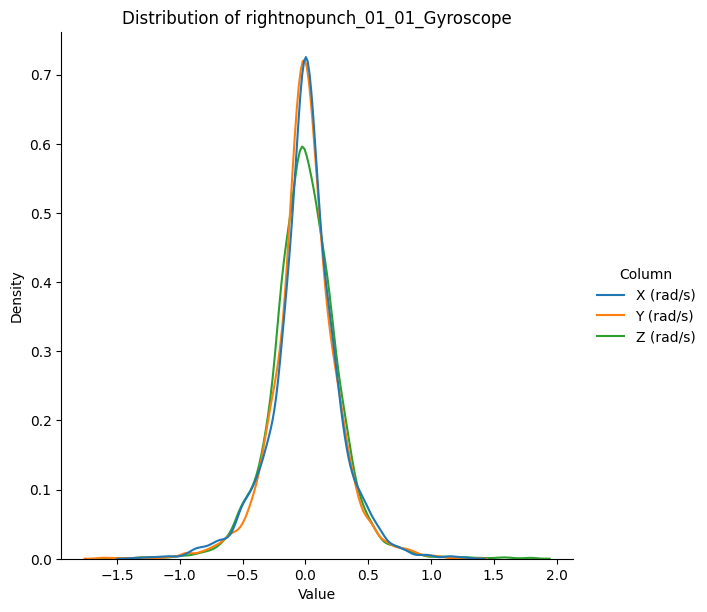

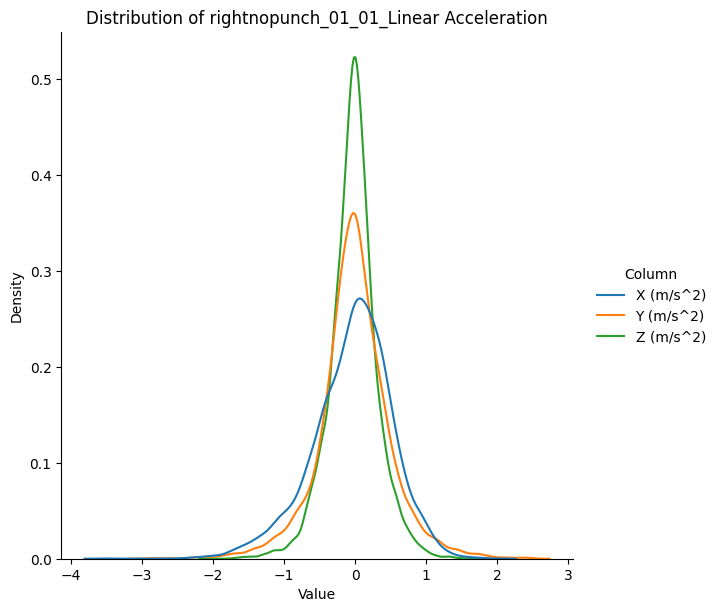

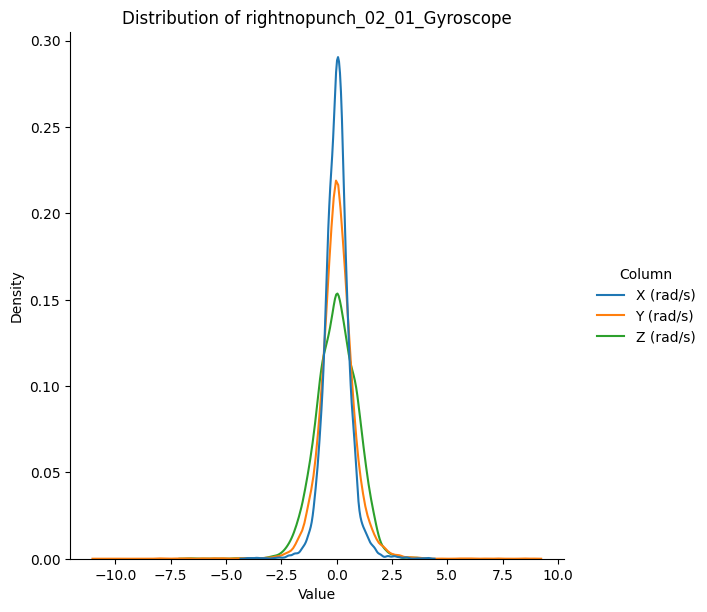

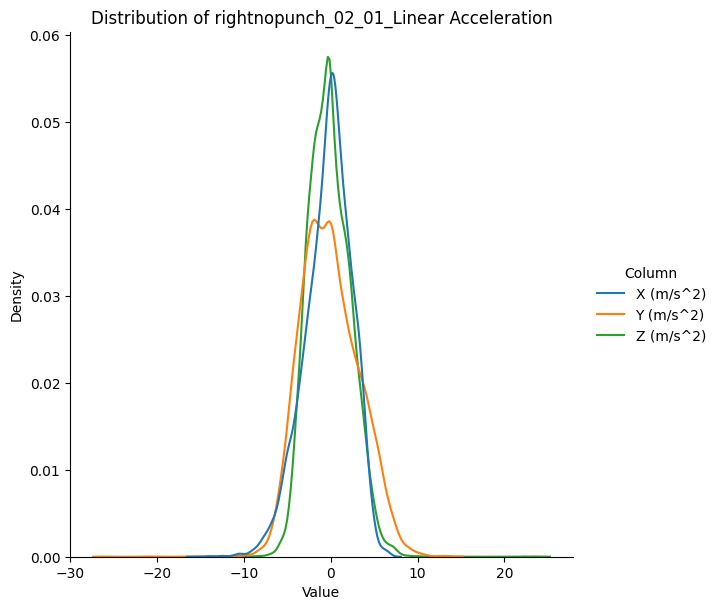

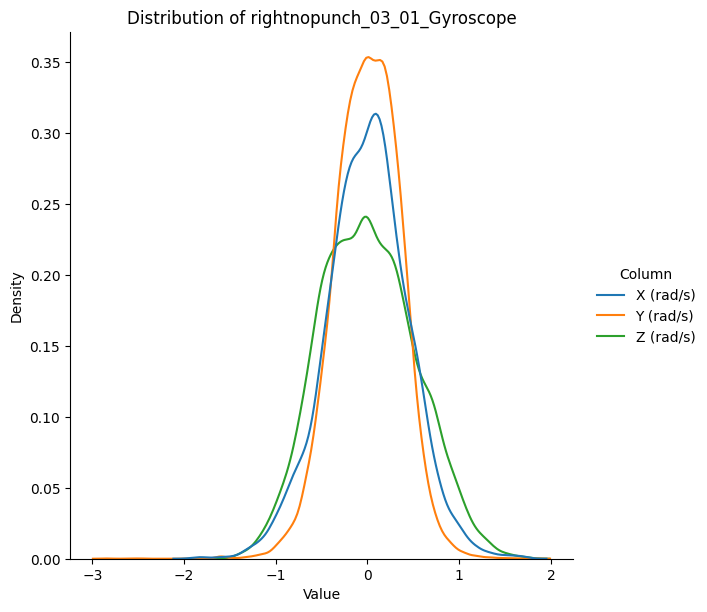

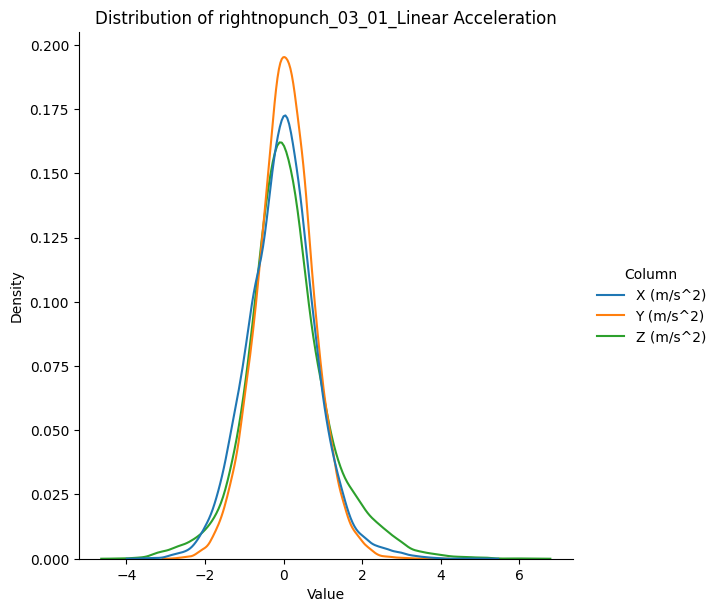

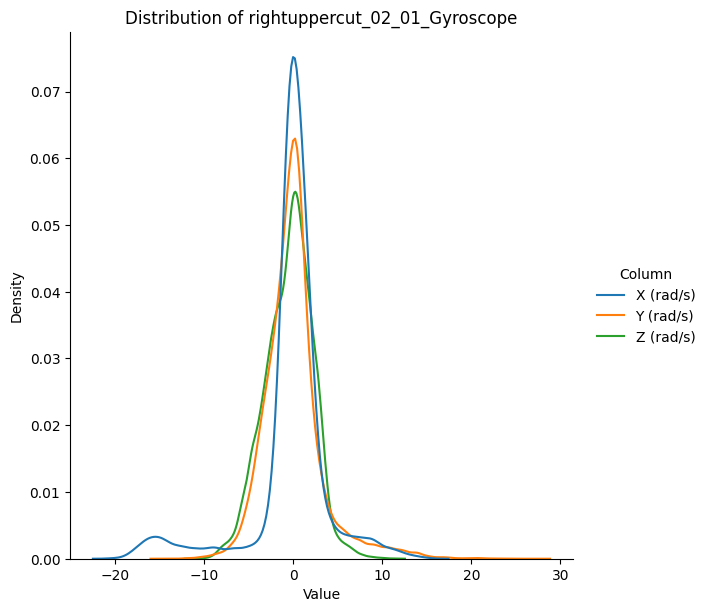

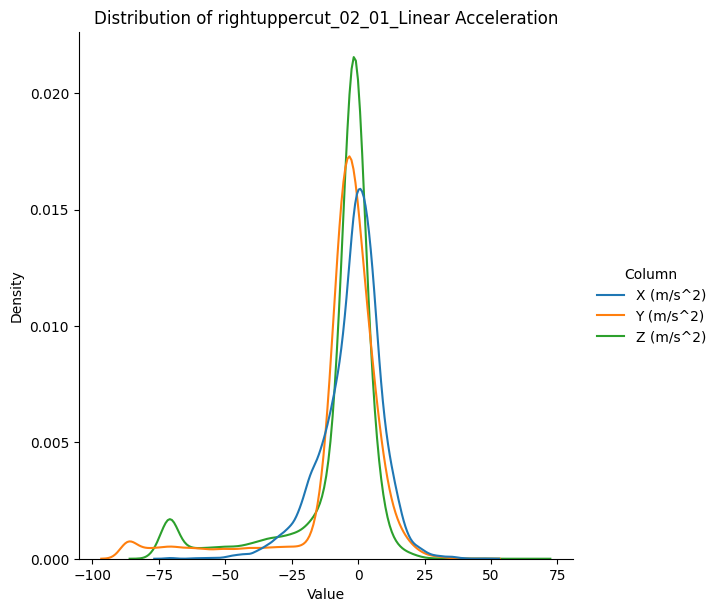

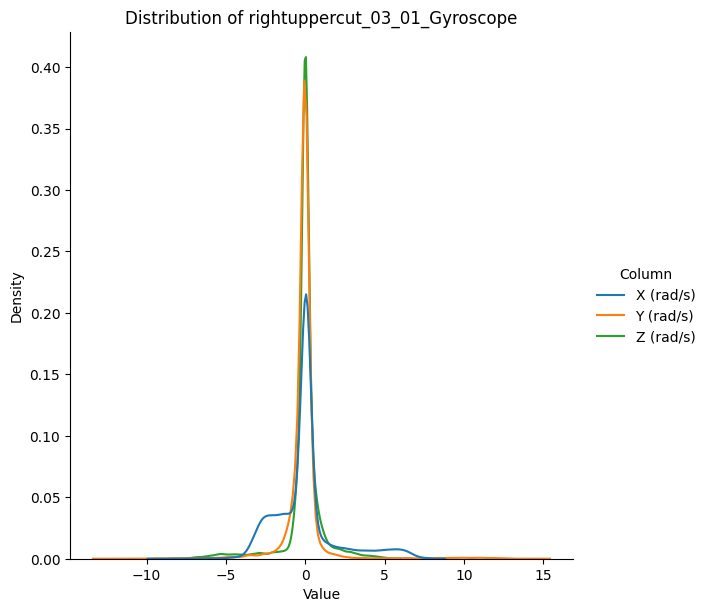

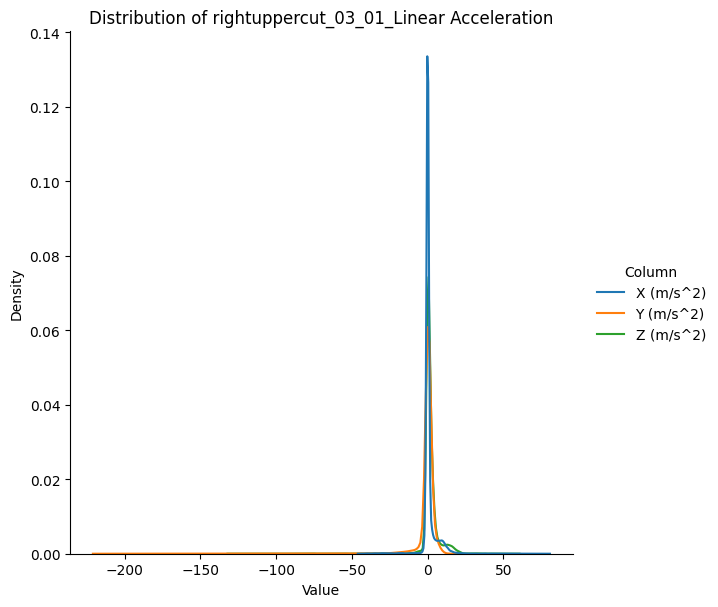

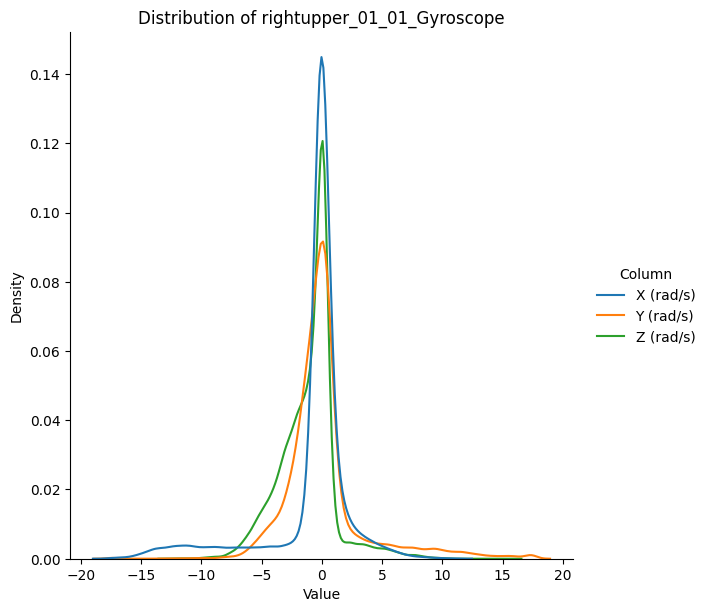

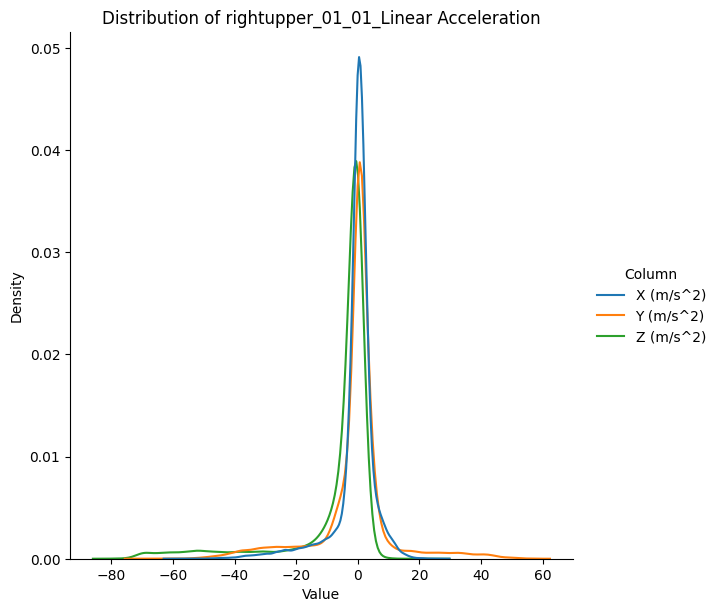

In [18]:
# Plot the distributions
for data in dict_exp_data_no_time.keys():
    df_melted = dict_exp_data_no_time[data].melt(var_name='Column', value_name='Value')

    sns.displot(df_melted, x='Value', hue='Column', kind='kde', height=6, aspect=1)
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Distribution of {data.replace("_noTime", "")}')
    plt.show()

In [19]:
dict_exp_data.keys()

dict_keys(['cross_01_01_Gyroscope', 'cross_01_01_Linear Acceleration', 'cross_02_01_Gyroscope', 'cross_02_01_Linear Acceleration', 'cross_03_01_Gyroscope', 'cross_03_01_Linear Acceleration', 'jab_01_01_Gyroscope', 'jab_01_01_Linear Acceleration', 'jab_02_01_Gyroscope', 'jab_02_01_Linear Acceleration', 'jab_03_01_Gyroscope', 'jab_03_01_Linear Acceleration', 'lefthook_01_01_Gyroscope', 'lefthook_01_01_Linear Acceleration', 'lefthook_02_01_Gyroscope', 'lefthook_02_01_Linear Acceleration', 'lefthook_03_01_Gyroscope', 'lefthook_03_01_Linear Acceleration', 'leftnopunch_01_01_Gyroscope', 'leftnopunch_01_01_Linear Acceleration', 'leftnopunch_02_01_Gyroscope', 'leftnopunch_02_01_Linear Acceleration', 'leftnopunch_03_01_Gyroscope', 'leftnopunch_03_01_Linear Acceleration', 'leftuppercut_02_01_Gyroscope', 'leftuppercut_02_01_Linear Acceleration', 'leftuppercut_03_01_Gyroscope', 'leftuppercut_03_01_Linear Acceleration', 'leftupper_01_01_Gyroscope', 'leftupper_01_01_Linear Acceleration', 'righthook_

In [20]:
def display_linechart(start_sec, end_sec, df, metric_name, punch_type, savefig = False):

    """
    Displays a linechart of Time Series of a metric from start_sec to end_sec. 

    Example usage:
        # Get the time series of Gyroscope data of jab in the first 5 seconds
        display_linechart(0, 5, dict_exp_data['jab_01_01_Gyroscope'], "Rotation", "Jab")
    """

    for i in range(len(df.columns)):
        
        x = df[df.columns[0]]
        y_x = df[df.columns[1]]
        y_y = df[df.columns[2]]
        y_z = df[df.columns[3]]

    start_index = start_sec * 50
    end_index = end_sec * 50 + 1
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    # Plot for X
    axs[0].plot(x [start_index:end_index], y_x [start_index:end_index], color='b')
    axs[0].set_title(f'{metric_name} in X direction')
    axs[0].set_ylim(-100,100)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel(df.columns[1])
    axs[0].grid(True)

    # Plot for Y 
    axs[1].plot(x [start_index:end_index], y_y [start_index:end_index] , color='g')
    axs[1].set_title(f'{metric_name}  in Y direction')
    axs[1].set_ylim(-100,100)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel(df.columns[2])
    axs[1].grid(True)

    # Plot for Z 
    axs[2].plot(x [start_index:end_index], y_z [start_index:end_index] , color='r')
    axs[2].set_title(f'{metric_name}  in Z direction')
    axs[2].set_ylim(-100,100)
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel(df.columns[3])
    axs[2].grid(True)

    # Display and/or save the figure
    plt.tight_layout()

    if savefig:
        plt.savefig(os.path.join(dirpath_savefig, f"Series of {metric_name} of {punch_type} during {start_sec} and {start_sec} second"))
    plt.show()

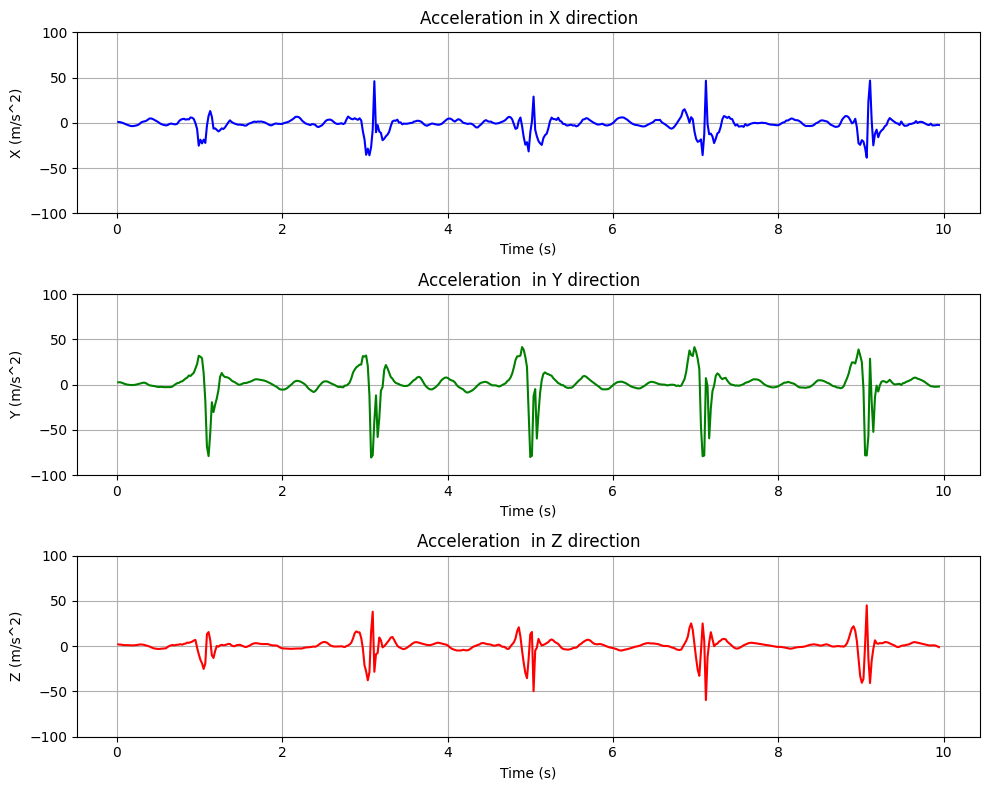

In [53]:
display_linechart(0, 10, dict_exp_data['jab_02_01_Linear Acceleration'], "Acceleration", "lefthand nopunch", savefig=False)

In [54]:
y1 = [0.8708, 0.804, 0.8419, 0.784, 0.7862, 0.8241]
y2 = [0.7936,0.8807, 0.8807, 0.8028, 0.8394, 0.8624]
x = [1,2,3,4,5,6]

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aggregate_data',
 'boxplot_feature',
 'cowsay',
 'display_linechart',
 'get_metrics_from_report',
 'knn_model_pred',
 'pd',
 'plot_metrics_at_ks',
 'shuffle_data']